<a href="https://colab.research.google.com/github/FilippMaksimov/Net.FeaturesAndModels/blob/main/Models_Maksimov_F_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Проверка на наличие пропусков и удаление в случае их обнаружения



In [ ]:
#Исходя их датасета можно обноружить, что пропуски обозначены "?". Поэтому

def check_nulls(data):
  total_rows = len(data)
  # Применяем функцию к DataFrame, чтобы определить наличие "?"
  contains_question_mark = data.applymap(lambda x: '?' in str(x))
  # Вычисление процентного соотношения для каждого столбца
  percentage_with_question_mark = {
      column: (contains_question_mark[column].sum() / total_rows) * 100
      for column in data.columns
  }
  for column, percentage in percentage_with_question_mark.items():
      print(f"{column}: {percentage:.2f}")

In [ ]:
check_nulls(df)

<ipython-input-3-f68c44fff1fd>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_question_mark = data.applymap(lambda x: '?' in str(x))


age: 0.00
workclass: 5.73
fnlwgt: 0.00
education: 0.00
educational-num: 0.00
marital-status: 0.00
occupation: 5.75
relationship: 0.00
race: 0.00
gender: 0.00
capital-gain: 0.00
capital-loss: 0.00
hours-per-week: 0.00
native-country: 1.75
income: 0.00


In [ ]:
#Удаление ячеек с отсутствием данных
df = df[~(df['workclass'].str.contains('\?'))]
df = df[~(df['occupation'].str.contains('\?'))]
df = df[~(df['native-country'].str.contains('\?'))]

In [ ]:
check_nulls(df)

<ipython-input-3-f68c44fff1fd>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_question_mark = data.applymap(lambda x: '?' in str(x))


age: 0.00
workclass: 0.00
fnlwgt: 0.00
education: 0.00
educational-num: 0.00
marital-status: 0.00
occupation: 0.00
relationship: 0.00
race: 0.00
gender: 0.00
capital-gain: 0.00
capital-loss: 0.00
hours-per-week: 0.00
native-country: 0.00
income: 0.00


Text(0.5, 0.92, 'income')

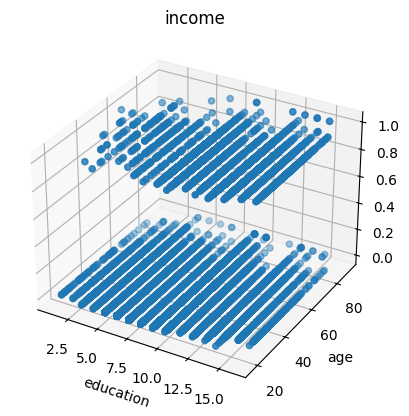

In [ ]:
#Кодировка категоральных перменных income и визуализация income (по оси z)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['income'])

y = df['age']
x = df['educational-num']
z = le.transform(df['income'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('education')
plt.ylabel('age')
ax.scatter(x, y, z)
plt.title('income')

In [ ]:
X = pd.DataFrame(columns=['education', 'age'])
X['education'] = df['educational-num']
X['age'] = df['age']
Y = pd.Series(z)

Логистическая реегрессия

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Точность модели на обучающей и тестовой выборке
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7769300937059458
0.7814262023217247


Метод опорных векторов SVM

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x_train, y_train)
predictions_cvm = clf.predict(x_test)
print(predictions[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Точность модели на обучающей и тестовой выборке
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.7852779390220306
0.789828634604754


Вывод. Точность классификации при использовании метода опорных векторов оказалось чуть выше, чем при использовании логистической регрессии